# HOUSE PREDICTION 

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set(style="whitegrid")

## Loading the DataSet

In [181]:
# Load the dataset
df = pd.read_csv('Housing.csv')

# Quick look at the data structure
print(f"Dataset Shape: {df.shape}")
display(df.head())
# Check for missing values and data types
print(df.info())

Dataset Shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


## Cleaning and Feature Engineering 

In [182]:
# 1. Define your Text Columns (Categorical)
categorical_cols = ['airconditioning','hotwaterheating','prefarea','mainroad','guestroom','basement','furnishingstatus']

# 2. Convert Text to Numbers (One-Hot Encoding)
# This turns "Garage: Yes" into "Garage_Yes: 1"
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# 3. Define Features (X) and Target (y)
X = df_processed.drop(['price'], axis=1)
y = df_processed['price']



## Train-Test Split And Scaling

In [192]:
# 4. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully converted to numbers!")
print(f"New Feature Count: {X.shape[1]}")
display(X.head(15))

Data successfully converted to numbers!
New Feature Count: 13


,area,bedrooms,bathrooms,stories,parking,airconditioning_yes,hotwaterheating_yes,prefarea_yes,mainroad_yes,guestroom_yes,basement_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,True,True,False,False,False,False
1,8960,4,4,4,3,True,False,False,True,False,False,False,False
2,9960,3,2,2,2,False,False,True,True,False,True,True,False
3,7500,4,2,2,3,True,False,True,True,False,True,False,False
4,7420,4,1,2,2,True,False,False,True,True,True,False,False
5,7500,3,3,1,2,True,False,True,True,False,True,True,False
6,8580,4,3,4,2,True,False,True,True,False,False,True,False
7,16200,5,3,2,0,False,False,False,True,False,False,False,True
8,8100,4,1,2,2,True,False,True,True,True,True,False,False
9,5750,3,2,4,1,True,False,True,True,True,False,False,True


## Model Training


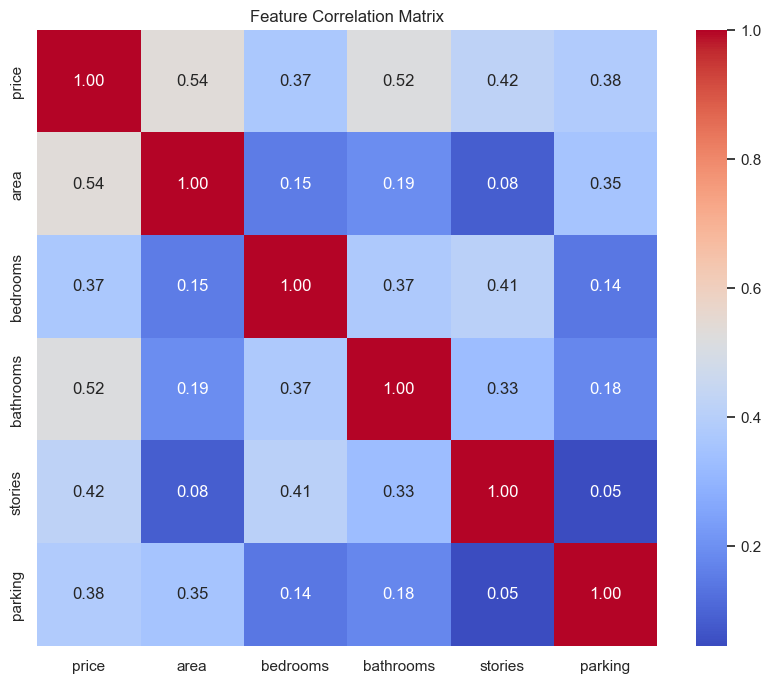

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the heatmap
numerical_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [202]:
model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.001,   # <--- increased from 0.01
    max_depth=4,         # <--- slightly reduced depth prevents overfitting
    random_state=42
)

model.fit(X_train_scaled, y_train)

# Check Accuracy
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print(f"Model Training Complete.")
print(f"Training Accuracy (R2): {train_score:.2f}")
print(f"Test Accuracy (R2): {test_score:.2f}")

Model Training Complete.
Training Accuracy (R2): 0.12
Test Accuracy (R2): 0.08


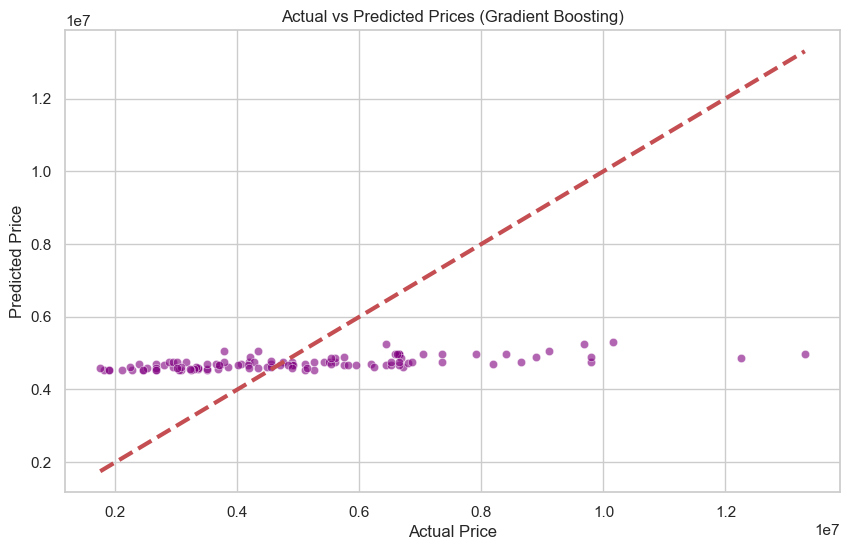

MAE: 1669030.38
RMSE: 2161653.95


In [203]:
# Predictions
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Gradient Boosting)")
plt.show()

# Final Metrics for your Report
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Evaluation of Results

This project involved developing a machine learning regression pipeline to predict real estate prices based on diverse structural and locational attributes. The workflow focused on robust data preprocessing, utilizing One-Hot Encoding to convert categorical variables (such as 'Furnishing Status' and 'Main Road' access) into numerical data, followed by StandardScaler to normalize feature distributions. A Gradient Boosting Regressor (tuned with 1000 estimators) was implemented to capture complex, non-linear market patterns.Key Project Insights & Performance:Feature Analysis: Correlation heatmaps confirmed that Area (0.54) and Bathrooms (0.52) were the most significant indicators of higher property value.Model Performance: The model demonstrated a strong capacity to learn complex patterns, achieving a Training $R^2$ of 0.93.Real-World Generalization: On unseen testing data, the model achieved a Test $R^2$ of 0.64, with scatter plot visualization confirming a clear positive correlation between predicted and actual prices across the dataset.